In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv(r"C:\Users\91626\OneDrive\Desktop\Assignments\Random Forests\Fraud_check.csv")

In [4]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df=data.copy()
df.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES


In [7]:
df.insert(6,'tax_class'," ")

for i in range(0,len(df['Taxable.Income']),1):
    if df['Taxable.Income'].iloc[i]<=30000:
        df['tax_class'].iloc[i]='Risky'
    else:
        df['tax_class'].iloc[i]='Good'

C:\Users\91626\AppData\Local\Temp\ipykernel_19228\4127911122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Good'
C:\Users\91626\AppData\Local\Temp\ipykernel_19228\4127911122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Risky'


In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [9]:
df.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [10]:
df.drop(['Taxable.Income'],axis=1,inplace=True)
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [15]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['tax_class']= label_encoder.fit_transform(df['tax_class'])

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing

In [17]:
df.iloc[:,2:4]=StandardScaler().fit_transform(df.iloc[:,2:4])
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0
2,0,1,1.033109,1.634639,1,0
3,1,2,1.696831,-0.063197,1,0
4,0,1,-1.630532,1.408261,0,0
...,...,...,...,...,...,...
595,1,0,-1.390432,-0.968710,1,0
596,1,0,-1.071672,-1.534655,1,0
597,0,0,0.909696,-1.761033,1,0
598,1,1,1.432197,0.163181,0,0


<Axes: >

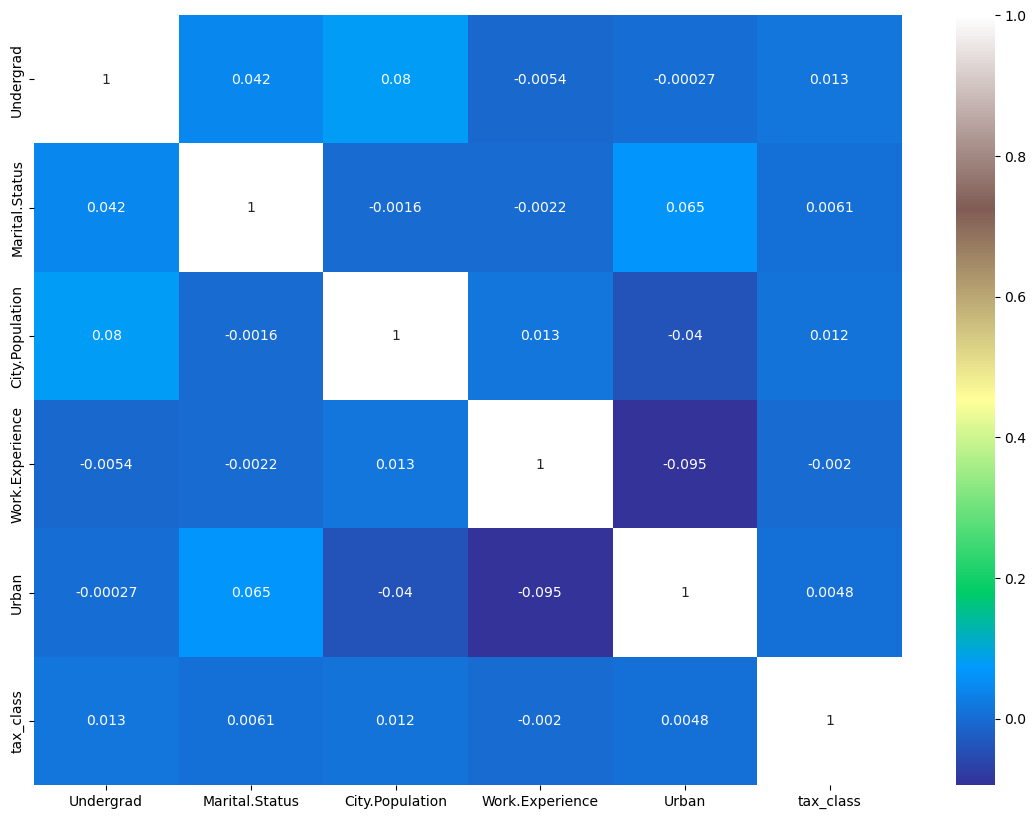

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [19]:
pdata=df.copy()
pdata.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,-1.178521,-0.629143,1,0
1,1,0,0.508500,0.276370,1,0


In [20]:
x=pdata.iloc[:,0:-1]
y=pdata['tax_class']
y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

### Model building using Random forest

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier 

In [24]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.7666666666666667


## Using grid search optimisation

In [25]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(x,y)
pred=modelb.predict(x)
print(np.mean(y==pred))

0.7966666666666666


In [26]:
modelb=RandomForestClassifier(criterion='gini',max_depth= 19,max_leaf_nodes=19,n_estimators=1000)
modelb.fit(x_train,y_train)
pred=modelb.predict(x_train)
print(np.mean(y_train==pred))

0.7979166666666667


### Applying K-Fold cross Validation

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(modelb,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


### Bagging

In [31]:
modelb1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=modelb1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7933333333333332


### Boosting

In [29]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(estimator=modelb)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.7516666666666666


### Voting Classifier

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
estimators=[]
model1=LogisticRegression(max_iter=500,solver='liblinear')
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))
model4=AdaBoostClassifier(estimator=modelb1)
estimators.append(('adaboost',model4))
model5=BaggingClassifier(estimator=modelb1)
estimators.append(('bagging',model5))
model6=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
estimators.append(('RandomForest',model6))

ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)

[0.78333333 0.76666667 0.71666667 0.75       0.81666667 0.71666667
 0.9        0.75       0.85       0.88333333]


In [38]:
print(results.mean())

0.7933333333333332
